## Libraries

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Model Training /  PCA Plot

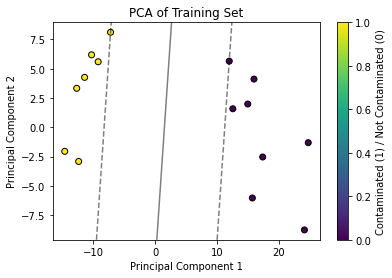

In [4]:
#Loading the dataset
data = pd.read_csv('Turbines_full.csv',index_col=0)
frequencies = np.loadtxt("Calibration_794nm.txt")

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    data.loc[:, data.columns != 'contaminated'], data['contaminated'])

#Standardising the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Performing PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
pca.fit(X_test_scaled)
pca_X_train = pca.transform(X_train_scaled)
pcs_X_test = pca.transform(X_test_scaled)

# #SVM Model Training
model = SVC(kernel='linear', C=1.0)
model.fit(pca_X_train, Y_train)

#Evaluating Model
Y_train_pred = model.predict(pca_X_train)
pca_X_test = pca.transform(X_test_scaled)
Y_test_pred = model.predict(pca_X_test)

# Plotting PCA graph
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=Y_train_pred, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Set')
plt.colorbar(label='Contaminated (1) / Not Contaminated (0)')

# Plotting decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plotting decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

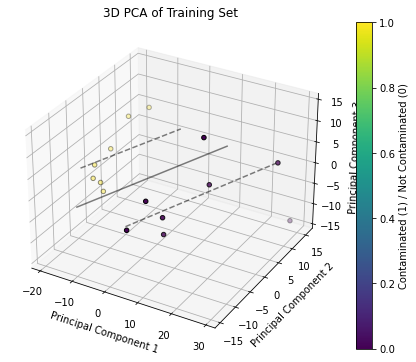

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
pca_3d.fit(X_train_scaled)
pca_X_train_3d = pca_3d.transform(X_train_scaled)

# SVM Model Training
model_3d = SVC(kernel='linear', C=1.0)
model_3d.fit(pca_X_train_3d, Y_train)

# Plotting 3D PCA graph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_X_train_3d[:, 0], pca_X_train_3d[:, 1], pca_X_train_3d[:, 2], c=Y_train_pred, cmap='viridis', edgecolor='k')

# Plotting decision boundary
xx, yy = np.meshgrid(np.linspace(pca_X_train_3d[:, 0].min(), pca_X_train_3d[:, 0].max(), 100),
                     np.linspace(pca_X_train_3d[:, 1].min(), pca_X_train_3d[:, 1].max(), 100))
Z = model_3d.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])

# Plotting decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Setting labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Training Set')

# Adding colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Contaminated (1) / Not Contaminated (0)')

plt.show()


Explained Variance Ratios: [0.70430852 0.18123715]
Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



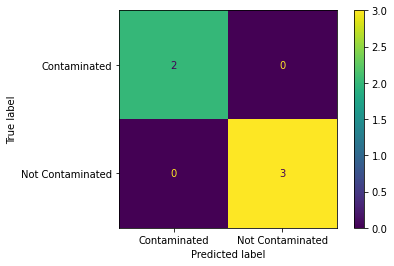

In [6]:
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

#Classification Report
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Testing Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_test_pred))

#Confusion Matrix
metrics.ConfusionMatrixDisplay.from_estimator(model, pca_X_test, Y_test_pred, 
                                              display_labels=['Contaminated', 'Not Contaminated'])
plt.show()

## Pipelines/ K-fold Cross-Validation / Metric vs Hyperparameter Plot

Accuracy for C=1: 1.0 +/- 0.0


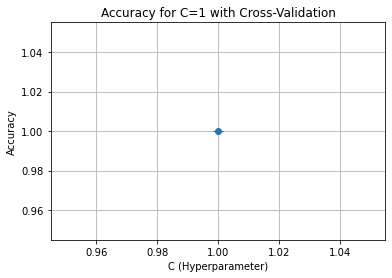

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score

# Loading the dataset
data = pd.read_csv('Turbines_full.csv', index_col=0)

# Splitting the data
X = data.loc[:, data.columns != 'contaminated']
y = data['contaminated']

# Creating the pipeline with SVM and PCA
scaler = StandardScaler()
pca = PCA(n_components=2)
svm = SVC(kernel='linear', C=1)  # Set C=1
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('svm', svm)
])

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for C=1
cv_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=make_scorer(accuracy_score))

# Print the accuracy for C=1
print(f'Accuracy for C=1: {np.mean(cv_scores)} +/- {np.std(cv_scores)}')

# Plotting METRIC vs HYPERPARAMETER for C=1
plt.errorbar([1], [np.mean(cv_scores)], yerr=[np.std(cv_scores)], fmt='o-', capsize=5)
plt.xlabel('C (Hyperparameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy for C=1 with Cross-Validation')
plt.grid(True)
plt.show()
